In [1]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.2 MB/s et

In [6]:
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
#drive.mount('/content/drive')
%cd 'drive/My Drive/CLV-Prediction'

/content/drive/My Drive/CLV-Prediction


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("final_data.csv")
data

,CustomerID,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
0,12346,-283.0,1,254705.880,254705.880000,0.000000,0.0
1,12747,-53.0,10,12814.824,139.291565,93.819000,1.0
2,12748,0.0,185,88425.579,24.859595,24.123771,1.0
3,12749,-116.0,3,9092.259,71.033273,62.079507,1.0
4,12820,-30.0,4,3109.722,52.707153,0.000000,0.0
...,...,...,...,...,...,...,...
3722,18280,-264.0,1,595.980,59.598000,0.000000,0.0
3723,18281,-108.0,1,266.706,38.100857,0.000000,0.0
3724,18282,-112.0,1,330.693,47.241857,51.374400,1.0
3725,18283,-2.0,14,5336.826,8.593923,14.134230,1.0


In [ ]:
data.corr()

,CustomerID,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
CustomerID,1.000000,0.006634,-0.012968,0.004558,-0.005420,-0.009219,-0.031065
Recency,0.006634,1.000000,0.261108,0.115793,-0.024948,0.010685,0.215588
Frequence,-0.012968,0.261108,1.000000,0.492472,-0.008154,0.110464,0.316593
MonetarySum,0.004558,0.115793,0.492472,1.000000,0.466045,0.225987,0.177765
MonetaryMean,-0.005420,-0.024948,-0.008154,0.466045,1.000000,0.019513,0.017493
Monetary_80_days,-0.009219,0.010685,0.110464,0.225987,0.019513,1.000000,0.199425
prob_80_days,-0.031065,0.215588,0.316593,0.177765,0.017493,0.199425,1.000000


In [7]:
data = data.set_index("CustomerID")
data.head()

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
CustomerID,,,,,,
12346,-283.0,1,254705.880,254705.880000,0.000000,0.0
12747,-53.0,10,12814.824,139.291565,93.819000,1.0
12748,0.0,185,88425.579,24.859595,24.123771,1.0
12749,-116.0,3,9092.259,71.033273,62.079507,1.0
12820,-30.0,4,3109.722,52.707153,0.000000,0.0


In [ ]:
data_ = data[data.prob_80_days == 1.]
data_

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
CustomerID,,,,,,
12747,-53.0,10,12814.824,139.291565,93.819000,1.0
12748,0.0,185,88425.579,24.859595,24.123771,1.0
12749,-116.0,3,9092.259,71.033273,62.079507,1.0
12827,-30.0,2,1051.710,52.585500,73.557000,1.0
12828,-52.0,5,2458.269,57.169047,69.498000,1.0
...,...,...,...,...,...,...
18260,-81.0,5,7261.254,64.258885,70.615050,1.0
18270,-24.0,1,564.960,94.160000,73.887000,1.0
18272,-32.0,5,8930.889,62.020063,55.837500,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
data_ml = pd.DataFrame(scaler.fit_transform(data.drop(['Monetary_80_days', "prob_80_days"], axis=1)))
data_ml.columns = ["Recency",	"Frequence",	"MonetarySum", "MonetaryMean"]
data_ml.index = data.index
data_ml['Monetary_80_days'] = data['Monetary_80_days']
data_ml

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days
CustomerID,,,,,
12346,-1.568527,-0.445089,11.404841,25.316720,0.000000
12747,0.482050,0.943326,0.329597,-0.020275,93.819000
12748,0.954574,27.940304,3.791517,-0.031665,24.123771
12749,-0.079630,-0.136553,0.159155,-0.027069,62.079507
12820,0.687107,0.017716,-0.114762,-0.028893,0.000000
...,...,...,...,...,...
18280,-1.399131,-0.445089,-0.229856,-0.028207,0.000000
18281,-0.008306,-0.445089,-0.244933,-0.030347,0.000000
18282,-0.043968,-0.445089,-0.242003,-0.029437,51.374400


In [ ]:
data.shape

(3727, 6)

In [ ]:
data_.shape

(1125, 6)

In [8]:
# Outliers
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(data)
outliers = clf.predict(data)

data["outliers"] = outliers

# Data without outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

print(data_no_outliers.shape)
print(data_with_outliers.shape)

(3354, 6)
(3727, 6)


In [9]:
data

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days,outliers
CustomerID,,,,,,,
12346,-283.0,1,254705.880,254705.880000,0.000000,0.0,1
12747,-53.0,10,12814.824,139.291565,93.819000,1.0,1
12748,0.0,185,88425.579,24.859595,24.123771,1.0,1
12749,-116.0,3,9092.259,71.033273,62.079507,1.0,0
12820,-30.0,4,3109.722,52.707153,0.000000,0.0,0
...,...,...,...,...,...,...,...
18280,-264.0,1,595.980,59.598000,0.000000,0.0,0
18281,-108.0,1,266.706,38.100857,0.000000,0.0,0
18282,-112.0,1,330.693,47.241857,51.374400,1.0,0


Recency                Axes(0.125,0.53;0.227941x0.35)
Frequence           Axes(0.398529,0.53;0.227941x0.35)
MonetarySum         Axes(0.672059,0.53;0.227941x0.35)
MonetaryMean           Axes(0.125,0.11;0.227941x0.35)
Monetary_80_days    Axes(0.398529,0.11;0.227941x0.35)
prob_80_days        Axes(0.672059,0.11;0.227941x0.35)
dtype: object

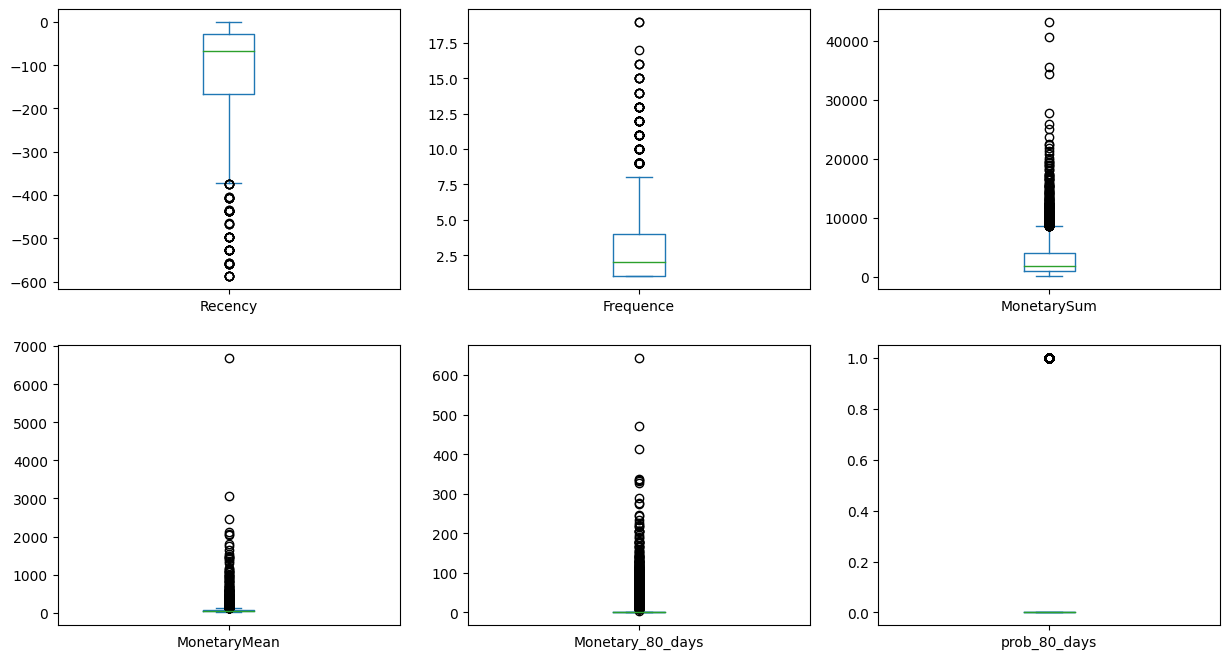

In [ ]:
data_no_outliers.plot(subplots=True, kind="box", layout=(2, 3), figsize=(15, 8))

In [ ]:
def remove_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1

  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df

Recency                Axes(0.125,0.53;0.227941x0.35)
Frequence           Axes(0.398529,0.53;0.227941x0.35)
MonetarySum         Axes(0.672059,0.53;0.227941x0.35)
MonetaryMean           Axes(0.125,0.11;0.227941x0.35)
Monetary_80_days    Axes(0.398529,0.11;0.227941x0.35)
prob_80_days        Axes(0.672059,0.11;0.227941x0.35)
dtype: object

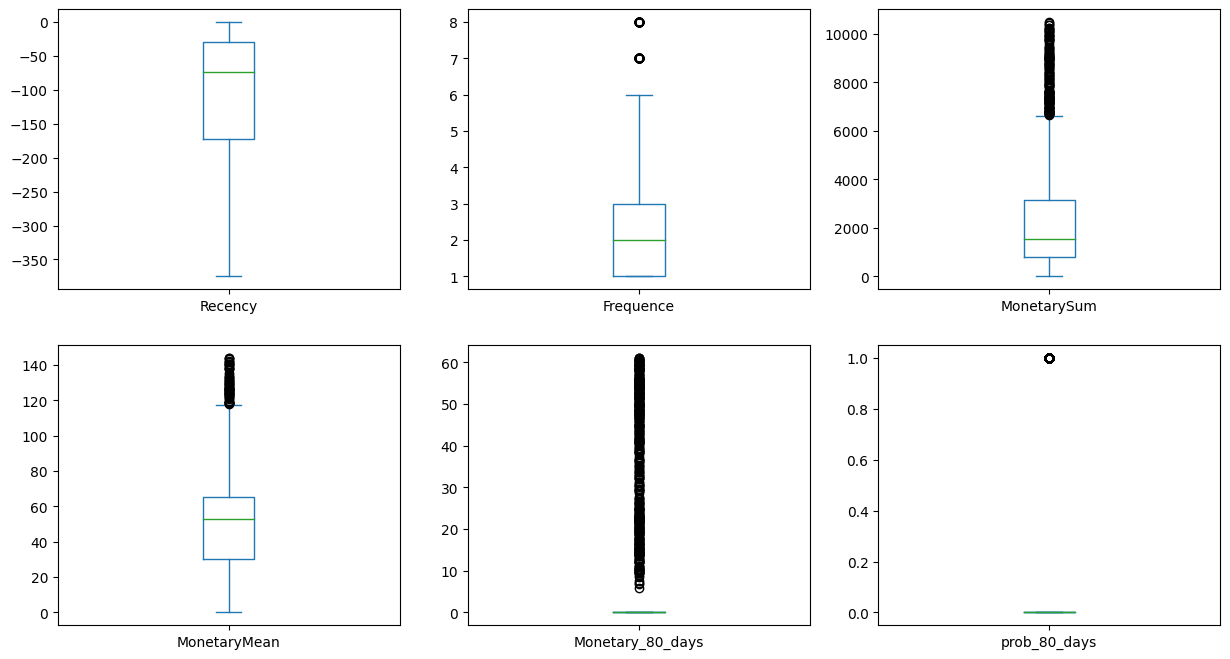

In [ ]:
data_ = remove_outliers(data.drop("outliers", axis=1))
data_.plot(subplots=True, kind="box", layout=(2, 3), figsize=(15, 8))

In [ ]:
data_.shape

(2600, 6)

In [46]:
data_train, data_test = train_test_split(data_no_outliers.drop(["prob_80_days"], axis=1), test_size=.2, random_state=1)

In [11]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data_train, target = 'Monetary_80_days', session_id=123,polynomial_degree=2)

,Description,Value
0,Session id,123
1,Target,Monetary_80_days
2,Target type,Regression
3,Original data shape,"(2683, 5)"
4,Transformed data shape,"(2683, 5)"
5,Transformed train set shape,"(1878, 5)"
6,Transformed test set shape,"(805, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,22.3874,1415.7014,36.7222,0.0252,2.4311,0.6191,1.2310
ridge,Ridge Regression,22.3874,1415.7010,36.7222,0.0252,2.4311,0.6190,0.0560
lar,Least Angle Regression,22.3874,1415.7012,36.7222,0.0252,2.4311,0.6191,0.0810
lasso,Lasso Regression,22.4463,1416.0684,36.7283,0.0249,2.4357,0.6170,0.0630
en,Elastic Net,22.4466,1415.9781,36.7271,0.0249,2.4357,0.6169,0.0830
llar,Lasso Least Angle Regression,22.4463,1416.0685,36.7283,0.0249,2.4357,0.6170,0.0720
br,Bayesian Ridge,22.5979,1420.4746,36.7880,0.0217,2.4476,0.6153,0.0500
omp,Orthogonal Matching Pursuit,22.9515,1436.3157,36.9856,0.0117,2.4837,0.6260,0.0330
dummy,Dummy Regressor,23.5324,1455.5288,37.2629,-0.0045,2.5246,0.6408,0.0290
gbr,Gradient Boosting Regressor,22.2121,1477.1800,37.7766,-0.0550,2.3282,0.6476,0.2430


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
data["Monetary_80_days"].describe()

count     3727.000000
mean        39.300009
std        299.742115
min          0.000000
25%          0.000000
50%          0.000000
75%         24.520172
max      14213.694000
Name: Monetary_80_days, dtype: float64

In [13]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,22.1694,1186.0880,34.4396,0.0198,2.4435,0.6321


,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prediction_label
CustomerID,,,,,,
15122,-190.0,2,3071.012939,66.761154,64.457253,11.680182
17994,-167.0,4,2227.136963,28.191608,0.000000,15.277901
15024,-99.0,8,4428.335938,35.712387,34.710106,24.165054
14035,-19.0,5,4712.465820,71.401001,0.000000,22.552675
14019,-33.0,3,4691.312988,71.080498,0.000000,19.092167
...,...,...,...,...,...,...
13016,-59.0,3,2606.636963,55.460361,0.000000,17.648125
15618,-123.0,4,2563.608398,56.969074,0.000000,16.872477
14284,-195.0,1,1132.395020,59.599735,63.994614,9.518068


In [14]:
from pycaret.classification.functional import create_model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def stackingML(models):
  level0 = list()
  for model_ in models:
    level0.append((model_, s.create_model(model_)))
  print(level0)
  level1 = LogisticRegression()
  model = StackingRegressor(estimators=level0, final_estimator=RandomForestRegressor(n_estimators=10), cv=5)

  steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', model)]
  pipeline = Pipeline(steps=steps)
  return model

In [ ]:
models = ["lr", "huber", "lasso",  "ridge"]
stacking_model = stackingML(models)
print(stacking_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.3274,791.4372,28.1325,0.0068,2.5121,0.5549
1,24.0085,1647.3115,40.5871,0.0398,2.3597,0.6486
2,22.8196,1397.9886,37.3897,-0.0014,2.4724,0.6456
3,22.3408,1944.3345,44.0946,0.0313,2.4385,0.6297
4,20.9001,1090.3373,33.0203,0.0309,2.4285,0.5896
5,21.7568,858.3868,29.2982,0.0365,2.4492,0.5992
6,23.5968,1271.4321,35.6571,0.0630,2.3610,0.6533
7,20.9864,1098.3174,33.1409,0.0173,2.4270,0.5689
8,22.4112,863.6094,29.3872,0.0236,2.4600,0.6678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.7707,935.3856,30.5841,-0.1739,1.7807,1.0000
1,18.4754,2028.7019,45.0411,-0.1826,1.8869,0.9813
2,15.0508,1622.5707,40.2811,-0.1622,1.9140,1.0000
3,14.9644,2231.1800,47.2354,-0.1116,1.8728,1.0000
4,13.9154,1297.7089,36.0237,-0.1534,1.7336,0.9872
5,14.6589,1105.7973,33.2535,-0.2412,1.9910,1.0000
6,18.3072,1692.0578,41.1346,-0.2470,2.1370,1.0000
7,14.2047,1295.2019,35.9889,-0.1589,1.7435,0.9788
8,15.6097,1104.8263,33.2389,-0.2491,1.8580,0.9875


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.3604,791.0668,28.1259,0.0072,2.5158,0.5492
1,24.1263,1650.3152,40.6241,0.0380,2.3659,0.6502
2,22.9105,1397.1406,37.3783,-0.0008,2.4802,0.6425
3,22.3266,1942.4261,44.0730,0.0323,2.4415,0.6203
4,20.9438,1088.4305,32.9914,0.0326,2.4337,0.5884
5,21.8059,861.4729,29.3509,0.0331,2.4533,0.5966
6,23.7158,1276.6785,35.7306,0.0591,2.3670,0.6543
7,20.9803,1097.4183,33.1273,0.0181,2.4277,0.5672
8,22.5019,863.1025,29.3786,0.0242,2.4651,0.6706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.3274,791.4352,28.1325,0.0068,2.5121,0.5549
1,24.0087,1647.3168,40.5872,0.0398,2.3597,0.6486
2,22.8196,1397.9863,37.3897,-0.0014,2.4724,0.6456
3,22.3408,1944.3317,44.0946,0.0313,2.4385,0.6297
4,20.9001,1090.3342,33.0202,0.0309,2.4285,0.5896
5,21.7568,858.3898,29.2983,0.0365,2.4492,0.5992
6,23.5969,1271.4374,35.6572,0.0630,2.3611,0.6533
7,20.9864,1098.3152,33.1408,0.0173,2.4270,0.5689
8,22.4113,863.6078,29.3872,0.0236,2.4600,0.6678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

[('lr', LinearRegression(n_jobs=-1)), ('huber', HuberRegressor()), ('lasso', Lasso(random_state=123)), ('ridge', Ridge(random_state=123))]
StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression(n_jobs=-1)),
                              ('huber', HuberRegressor()),
                              ('lasso', Lasso(random_state=123)),
                              ('ridge', Ridge(random_state=123))],
                  final_estimator=RandomForestRegressor(n_estimators=10))


In [15]:
X_train = data_train.drop("Monetary_80_days", axis=1)
y_train = data_train["Monetary_80_days"]

X_test = data_test.drop("Monetary_80_days", axis=1)
y_test = data_test["Monetary_80_days"]

In [16]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
cv = KFold(n_splits=10)
scores = cross_val_score(stacking_model, X_train, y_train, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
scores

array([-1586.71010241, -1141.29148378,  -996.37788314, -2223.91614602,
       -1608.00930884, -1103.15669018, -2784.7739498 , -1388.09477826,
       -2123.03734242, -1224.21357917])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

stacking_model.fit(X_train, y_train)
pred_train = stacking_model.predict(X_train)
print(mean_squared_error(y_train, pred_train))
print("="*70)
pred = stacking_model.predict(X_test)
print(mean_squared_error(y_test, pred))

1589.3936292507653
1801.3652626883604


In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

stacking_model.fit(X, y)
pred = stacking_model.predict(X)
print(mean_absolute_error(y, pred))

21.204796797706155


In [58]:
import optuna
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression, r_regression
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
# -- Define the objective function
def objective(trial, X, y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.1, random_state=1)

    # -- Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['standard', 'minmax', 'robust', ""])
    if scalers == "standard":
        scaler = StandardScaler()
    elif scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "robust":
      scaler = RobustScaler()
    else:
      scaler='passthrough'

    polys = trial.suggest_categorical("polys", ['Poly', ""])
    if polys == "Poly":
      degree = trial.suggest_int("degree", 1, 20)
      poly_features = PolynomialFeatures(degree=degree)
    else:
      scaler='passthrough'

    """
    polys2 = trial.suggest_categorical("polys2", ['Poly', ""])
    if polys2 == "Poly":
      degree2 = trial.suggest_int("degree2", 0, 10)
      poly_features2 = PolynomialFeatures(degree=degree2)
    else:
      scaler='passthrough'
    """
    # Reduction dim 1
    dim_red = trial.suggest_categorical("dim_red", ["PCA", "SK", ""])
    if dim_red == "PCA":
      n_components=trial.suggest_float("n_components", 0.0, 1.0)
      dimen_red_algorithm=PCA(n_components=n_components)

    elif dim_red == "SK":
      k = trial.suggest_int("k", 1, X.shape[1])
      score_func = trial.suggest_categorical("score_func", [r_regression, mutual_info_regression])
      dimen_red_algorithm = SelectKBest(score_func=score_func, k=k)

    elif dim_red == "t-SNE":
      n_components_tsne = trial.suggest_int("n_components_tsne", 1, X.shape[1])
      learning_rate=trial.suggest_float("learning_rate", 10.0, 1000.0)
      perplexity=trial.suggest_int("perplexity", 5, 500)

      dimen_red_algorithm = TSNE(n_components=n_components_tsne, learning_rate=learning_rate,
                                 init='random', perplexity=perplexity, n_iter = 5000)

    else:
        dimen_red_algorithm='passthrough'

    # Estimator 1
    estimator = trial.suggest_categorical(
        "estimator",  ["LR", "Ridge", "ElasticNet", "Lasso", "Huber"])

    if estimator == "LR":
      model = linear_model.LinearRegression()

    elif estimator == "Ridge":
      alpha = trial.suggest_float("alpha", 0, 100.0)
      model = linear_model.Ridge(alpha=alpha)

    elif estimator == "Lasso":
      alpha = trial.suggest_float("alpha", 0, 100)
      model = linear_model.Lasso(alpha=alpha)

    elif estimator == "ElasticNet":
      l1_ratio = trial.suggest_float("l1_ratio", 0, 1)
      alpha = trial.suggest_float("alpha", 0, 100)
      model = linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    else:
      alpha = trial.suggest_float("alpha", 0, 100)
      epsilon = trial.suggest_float("epsilon", 1, 100)
      model = linear_model.HuberRegressor(epsilon=epsilon, alpha=alpha)

    try:
      pipeline = make_pipeline(scaler, poly_features, dimen_red_algorithm, model)

      scores = []
      for (train_ts, test_ts) in KFold(n_splits=5, shuffle=True, random_state=123).split(X_train, Y_train):
        x_train = X_train.values[train_ts]
        y_train = Y_train.values[train_ts]
        x_test = X_train.values[test_ts]
        y_test = Y_train.values[test_ts]
        pipeline.fit(x_train, y_train)
        pred_test = pipeline.predict(x_test)
        scores += [metrics.mean_squared_error(y_test, pred_test)]

      pred = pipeline.predict(X_test)
      pred = np.where(pred<0, 0, pred)
      score = metrics.mean_squared_error(Y_test, pred)
      #score = np.mean(scores)
      #print("Training score: ", np.mean(scores))
      trial.set_user_attr(key="best_model", value=pipeline)

      return score
    except:
      pass

def callback(study, trial):
  try:
    if study.best_trial.number == trial.number:
      study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])

    for ii, t in enumerate(study.trials):
        if t.value <= .8:
            study.stop()
  except:
    pass


X_train = data_train.drop("Monetary_80_days", axis=1)
Y_train = data_train["Monetary_80_days"]

X_test = data_test.drop("Monetary_80_days", axis=1)
Y_test = data_test["Monetary_80_days"]

X = pd.concat([X_train, X_test])
y = pd.concat([Y_train, Y_test])

func = lambda trial: objective(trial, X_train, Y_train)
study = optuna.create_study(direction="minimize")
study.optimize(func, n_trials=300, callbacks=[callback])

best_model = study.user_attrs["best_model"]
pred = best_model.predict(X_test)
pred = np.where(pred<0, 0, pred)

score = metrics.mean_absolute_error(Y_test, pred)
print(" ===> MAE: ", score)
study.best_trial.params

[I 2023-11-19 19:14:08,718] A new study created in memory with name: no-name-b7638bba-fb54-4b62-bd51-1b93252da3f6
[W 2023-11-19 19:14:08,724] Trial 0 failed with parameters: {'scalers': 'standard', 'polys': '', 'dim_red': '', 'estimator': 'Huber', 'alpha': 25.742315279799943, 'epsilon': 7.265462327023265} because of the following error: The value None could not be cast to float..
[W 2023-11-19 19:14:08,725] Trial 0 failed with value None.
[W 2023-11-19 19:17:48,019] Trial 1 failed with parameters: {'scalers': '', 'polys': 'Poly', 'degree': 19, 'dim_red': 'SK', 'k': 4, 'score_func': <function mutual_info_regression at 0x7d4d3d119990>, 'estimator': 'LR'} because of the following error: The value None could not be cast to float..
[W 2023-11-19 19:17:48,021] Trial 1 failed with value None.
[W 2023-11-19 19:17:48,031] Trial 2 failed with parameters: {'scalers': 'robust', 'polys': '', 'dim_red': 'PCA', 'n_components': 0.162064162605426, 'estimator': 'ElasticNet', 'l1_ratio': 0.40665971448107

 ===> MAE:  22.848357697009554


{'scalers': '',
 'polys': 'Poly',
 'degree': 1,
 'dim_red': '',
 'estimator': 'Ridge',
 'alpha': 3.374273453370591}

In [59]:
best_model

Pipeline(steps=[('passthrough-1', 'passthrough'),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('passthrough-2', 'passthrough'),
                ('ridge', Ridge(alpha=3.374273453370591))])

In [60]:
predictions = pd.DataFrame(Y_test)
predictions["Pred"] = pred
predictions[predictions.Monetary_80_days != 0]

,Monetary_80_days,Pred
CustomerID,,
17656,88.159500,20.120629
13704,57.684000,26.262664
17602,34.451309,21.148055
16898,9.508243,16.767659
15786,62.952800,17.339350
...,...,...
13758,153.843000,24.323975
18030,72.303000,15.290006
13266,61.049029,30.957279


In [61]:
predictions.describe()

,Monetary_80_days,Pred
count,671.000000,671.000000
mean,15.506146,15.785522
std,38.759289,6.248062
min,0.000000,0.000000
25%,0.000000,11.767669
50%,0.000000,15.470908
75%,0.000000,19.040733
max,414.150000,37.039921


In [62]:
best_model.fit(X, y)
pred = best_model.predict(X)
pred = np.where(pred<0, 0, pred)
predictions = pd.DataFrame(y)
predictions["Pred"] = pred
predictions[predictions.Monetary_80_days != 0]

,Monetary_80_days,Pred
CustomerID,,
14524,16.507700,28.085905
16361,22.414765,19.016369
17147,69.667500,15.251605
12963,62.826203,17.354595
17596,88.551000,23.711586
...,...,...
13758,153.843000,23.802777
18030,72.303000,14.706202
13266,61.049029,31.175144


In [63]:
predictions.sum()

Monetary_80_days    51703.626606
Pred                51769.466835
dtype: float64

In [64]:
52000.881224 - 51703.626606

297.254617999999

In [65]:
metrics.mean_absolute_error(y, pred)

22.17420753733919

In [66]:
predictions.describe()

,Monetary_80_days,Pred
count,3354.000000,3354.000000
mean,15.415512,15.435142
std,37.483104,6.485297
min,0.000000,0.000000
25%,0.000000,11.326325
50%,0.000000,15.052581
75%,0.000000,18.843923
max,643.500000,48.790162


In [68]:
import pickle
pickle.dump(best_model, open('reg_model.pkl', 'wb'))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
data_ml = data.drop(['Monetary_80_days', "prob_80_days"], axis=1)
data_ml.columns = ["Recency",	"Frequence", "MonetarySum",	"MonetaryMean"]
data_ml.index = data.index
data_ml['prob_80_days'] = data['prob_80_days']
data_ml

ValueError: ignored

In [ ]:
data_train, data_test = train_test_split(data_no_outliers.drop(['Monetary_80_days'], axis=1), test_size=.3, random_state=1)

In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data_train, target = 'prob_80_days', session_id=123, polynomial_degree=2)

,Description,Value
0,Session id,123
1,Target,prob_80_days
2,Target type,Binary
3,Original data shape,"(2347, 5)"
4,Transformed data shape,"(2347, 5)"
5,Transformed train set shape,"(1642, 5)"
6,Transformed test set shape,"(705, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7582,0.6818,0.0753,0.5074,0.1284,0.0722,0.1171,0.8390
dummy,Dummy Classifier,0.7576,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0280
lda,Linear Discriminant Analysis,0.7564,0.6867,0.0979,0.4908,0.1600,0.0883,0.1280,0.0320
ridge,Ridge Classifier,0.7558,0.0000,0.0576,0.4278,0.0995,0.0510,0.0824,0.0570
gbc,Gradient Boosting Classifier,0.7521,0.6709,0.1258,0.4379,0.1916,0.1020,0.1284,0.2090
ada,Ada Boost Classifier,0.7466,0.6688,0.1254,0.4276,0.1909,0.0922,0.1175,0.1440
rf,Random Forest Classifier,0.7424,0.6353,0.1835,0.4056,0.2502,0.1264,0.1389,0.3860
et,Extra Trees Classifier,0.7326,0.6258,0.2184,0.4014,0.2777,0.1344,0.1449,0.4290
svm,SVM - Linear Kernel,0.7314,0.0000,0.1126,0.1024,0.0852,0.0342,0.0407,0.0610
lightgbm,Light Gradient Boosting Machine,0.7229,0.6310,0.2063,0.3458,0.2567,0.1071,0.1094,0.7170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from pycaret.classification.functional import create_model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

def stackingML(models):
  level0 = list()
  for model_ in models:
    level0.append((model_, s.create_model(model_)))

  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

  steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', model)]
  pipeline = Pipeline(steps=steps)
  return pipeline

In [ ]:
models = ["gbc", "ada", "rf",  "et", "lr", "lda"]
stacking_model = stackingML(models)
print(stacking_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6948,0.1818,0.5882,0.2778,0.1583,0.2008
1,0.6995,0.6637,0.2364,0.5000,0.3210,0.1587,0.1770
2,0.7104,0.7623,0.3455,0.5278,0.4176,0.2359,0.2453
3,0.7322,0.7048,0.2727,0.6250,0.3797,0.2412,0.2749
4,0.7705,0.7503,0.3929,0.7333,0.5116,0.3791,0.4106
5,0.7198,0.7147,0.2364,0.5909,0.3377,0.1994,0.2331
6,0.7418,0.6795,0.3273,0.6429,0.4337,0.2887,0.3163
7,0.7363,0.6958,0.4000,0.5946,0.4783,0.3107,0.3216
8,0.7033,0.6739,0.3273,0.5143,0.4000,0.2156,0.2254


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6745,0.2364,0.5652,0.3333,0.1897,0.2189
1,0.6831,0.6594,0.2182,0.4444,0.2927,0.1181,0.1306
2,0.7596,0.7406,0.3455,0.7037,0.4634,0.3310,0.3658
3,0.7432,0.7009,0.3273,0.6429,0.4337,0.2897,0.3173
4,0.7596,0.7311,0.3214,0.7500,0.4500,0.3263,0.3743
5,0.7253,0.7236,0.2727,0.6000,0.3750,0.2295,0.2588
6,0.7308,0.6860,0.2727,0.6250,0.3797,0.2402,0.2740
7,0.7363,0.6994,0.3818,0.6000,0.4667,0.3028,0.3164
8,0.7143,0.6665,0.3273,0.5455,0.4091,0.2359,0.2493


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7049,0.6898,0.2364,0.5200,0.3250,0.1689,0.1904
1,0.7213,0.6277,0.2545,0.5833,0.3544,0.2102,0.2396
2,0.7596,0.7487,0.4545,0.6410,0.5319,0.3764,0.3865
3,0.6995,0.6705,0.3091,0.5000,0.3820,0.1978,0.2078
4,0.7596,0.7423,0.4286,0.6667,0.5217,0.3711,0.3873
5,0.7033,0.6707,0.2727,0.5172,0.3571,0.1876,0.2039
6,0.7308,0.6859,0.4000,0.5789,0.4731,0.3003,0.3096
7,0.7473,0.7082,0.4364,0.6154,0.5106,0.3469,0.3562
8,0.6923,0.6753,0.3091,0.4857,0.3778,0.1866,0.1950


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6940,0.6667,0.2727,0.4839,0.3488,0.1687,0.1806
1,0.7213,0.6351,0.3091,0.5667,0.4000,0.2384,0.2570
2,0.7596,0.7430,0.4545,0.6410,0.5319,0.3764,0.3865
3,0.6995,0.6670,0.3455,0.5000,0.4086,0.2161,0.2227
4,0.7814,0.7586,0.4821,0.7105,0.5745,0.4346,0.4494
5,0.6978,0.6925,0.3273,0.5000,0.3956,0.2057,0.2139
6,0.7253,0.6843,0.3818,0.5676,0.4565,0.2820,0.2919
7,0.7418,0.7047,0.3818,0.6176,0.4719,0.3134,0.3293
8,0.6868,0.6649,0.3273,0.4737,0.3871,0.1861,0.1918


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7049,0.7158,0.1455,0.5333,0.2286,0.1145,0.1517
1,0.6503,0.5984,0.3273,0.4000,0.3600,0.1227,0.1239
2,0.7213,0.7585,0.2000,0.6111,0.3014,0.1798,0.2237
3,0.7432,0.7193,0.2182,0.7500,0.3380,0.2343,0.3034
4,0.7650,0.7563,0.3393,0.7600,0.4691,0.3455,0.3919
5,0.7198,0.6689,0.4364,0.5455,0.4848,0.2956,0.2991
6,0.7473,0.6681,0.4000,0.6286,0.4889,0.3318,0.3468
7,0.7473,0.7240,0.3455,0.6552,0.4524,0.3080,0.3346
8,0.6648,0.6318,0.3273,0.4286,0.3711,0.1482,0.1507


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6903,0.0545,1.0000,0.1034,0.0747,0.1969
1,0.7213,0.6013,0.0727,1.0000,0.1356,0.0989,0.2280
2,0.7158,0.7358,0.0727,0.8000,0.1333,0.0876,0.1826
3,0.7213,0.7261,0.0909,0.8333,0.1639,0.1114,0.2139
4,0.7322,0.7493,0.1964,0.7333,0.3099,0.2074,0.2771
5,0.7088,0.6810,0.0727,0.6667,0.1311,0.0762,0.1465
6,0.7308,0.6855,0.1273,0.8750,0.2222,0.1576,0.2675
7,0.7473,0.7125,0.1818,0.9091,0.3030,0.2250,0.3352
8,0.7088,0.6504,0.0727,0.6667,0.1311,0.0762,0.1465


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Pipeline(memory=None,
         steps=[('over',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='minority',
                                   shrinkage=None)),
                ('model',
                 StackingClassifier(cv=5,
                                    estimators=[('gbc',
                                                 GradientBoostingClassifier(ccp_alpha=0.0,
                                                                            criterion='friedman_mse',
                                                                            init=None,
                                                                            learning_rate=0.1,
                                                                            loss='log_loss',
                                                                            max_depth=3,
                                                                            max_features=None,
     

In [ ]:
X_train = data_train.drop("prob_80_days", axis=1)
y_train = data_train["prob_80_days"]

X_test = data_test.drop("prob_80_days", axis=1)
y_test = data_test["prob_80_days"]

In [ ]:
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(stacking_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
scores

array([0.73180077, 0.71455939, 0.71264368, 0.72744722, 0.73320537,
       0.7183908 , 0.71455939, 0.72413793, 0.74088292, 0.75047985,
       0.72030651, 0.72796935, 0.73563218, 0.71976967, 0.7293666 ])

In [ ]:
from sklearn.metrics import classification_report

stacking_model.fit(X_train, y_train)
pred_train = stacking_model.predict(X_train)
print(classification_report(y_train, pred_train))
print("="*70)
pred = stacking_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1821
         1.0       1.00      1.00      1.00       787

    accuracy                           1.00      2608
   macro avg       1.00      1.00      1.00      2608
weighted avg       1.00      1.00      1.00      2608

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.83       781
         1.0       0.69      0.21      0.32       338

    accuracy                           0.73      1119
   macro avg       0.71      0.58      0.58      1119
weighted avg       0.72      0.73      0.68      1119



In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

stacking_model.fit(X, y)
pred = stacking_model.predict(X)
print(classification_report(y, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2602
         1.0       1.00      1.00      1.00      1125

    accuracy                           1.00      3727
   macro avg       1.00      1.00      1.00      3727
weighted avg       1.00      1.00      1.00      3727



In [ ]:
stacking_model.predict_proba(X)[:, 1]

array([0.93361768, 0.93907887, 0.95150237, ..., 0.00925177, 0.94688537,
       0.00900826])

In [ ]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
data.prob_80_days.value_counts(normalize=True)

0.0    0.698149
1.0    0.301851
Name: prob_80_days, dtype: float64

In [ ]:
3

In [ ]:
7/10

0.7

In [ ]:
3/10

0.3

In [ ]:
import optuna
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

# -- Define the objective function
def objective(trial, X, y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=1)

    # -- Instantiate scaler
    scalers = trial.suggest_categorical("scalers", ['standard', 'minmax', 'robust', ''])
    if scalers == "standard":
        scaler = StandardScaler()
    elif scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "robust":
      scaler = RobustScaler()
    else:
      scaler='passthrough'

    polys = trial.suggest_categorical("polys", ['Poly', ""])
    if polys == "Poly":
      degree = trial.suggest_int("degree", 1, 15)
      poly_features = PolynomialFeatures(degree=degree)
    else:
      scaler='passthrough'

    """
    polys2 = trial.suggest_categorical("polys2", ['Poly', ""])
    if polys2 == "Poly":
      degree2 = trial.suggest_int("degree2", 0, 10)
      poly_features2 = PolynomialFeatures(degree=degree2)
    else:
      scaler='passthrough'
    """
    # Reduction dim 1
    dim_red = trial.suggest_categorical("dim_red", ["PCA", "SK", ""])
    if dim_red == "PCA":
      n_components=trial.suggest_float("n_components", 0.0, 1.0)
      dimen_red_algorithm=PCA(n_components=n_components)

    elif dim_red == "SK":
      if "degree" in locals():
        k = trial.suggest_int("k", 1, X.shape[1] * degree)
      else:
        k = trial.suggest_int("k", 1, X.shape[1])

      score_func = trial.suggest_categorical("score_func", [f_classif, mutual_info_classif])
      dimen_red_algorithm = SelectKBest(score_func=score_func, k=k)

    elif dim_red == "t-SNE":
      n_components_tsne = trial.suggest_int("n_components_tsne", 1, X.shape[1])
      learning_rate=trial.suggest_float("learning_rate", 10.0, 1000.0)
      perplexity=trial.suggest_int("perplexity", 5, 500)

      dimen_red_algorithm = TSNE(n_components=n_components_tsne, learning_rate=learning_rate,
                                 init='random', perplexity=perplexity, n_iter = 5000)

    else:
        dimen_red_algorithm='passthrough'

    oversampling = RandomOverSampler(sampling_strategy='all')
    undersampling = RandomUnderSampler(sampling_strategy='all')
    # Estimator 1
    estimator = trial.suggest_categorical(
        "estimator",  ["LR", "RF", "LDA"])

    if estimator == "LR":
      Cs = trial.suggest_int("Cs", 1, 100)
      lr_class_weight = trial.suggest_categorical("lr_class_weight",  [None, "balanced", "balanced_subsample", {0: 1, 1:10}])
      penalty = trial.suggest_categorical("penalty",  ["l1", "l2", "elasticnet"])
      model = linear_model.LogisticRegressionCV(Cs=Cs, penalty=penalty, max_iter=1000, class_weight=lr_class_weight)

    elif estimator == "Ridge":
      alpha = trial.suggest_float("alpha", 0, 100.0)
      model = linear_model.RidgeClassifier(alpha=alpha)

    elif estimator == "LDA":
      solver = trial.suggest_categorical("solver",  ["svd", "lsqr", "eigen"])
      n_components_lda = trial.suggest_int("ln_components_lda1_ratio", 0, X.shape[1])
      shrinkage = trial.suggest_float("shrinkage", 0., 1.)
      model = LinearDiscriminantAnalysis(solver=solver, n_components=n_components_lda, shrinkage=shrinkage)

    elif estimator == "QDA":
      model = QuadraticDiscriminantAnalysis()

    else:
      #max_depth = trial.suggest_int("max_depth", 1, 10)
      class_weight = trial.suggest_categorical("class_weight",  [None, "balanced", "balanced_subsample", {0: 1, 1:10}])
      #min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0., 1.)
      n_estimators = trial.suggest_int("n_estimators", 0, 500)
      model = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight)

    try:
      #pipeline = make_pipeline(scaler, dimen_red_algorithm, poly_features, model)
      pipeline = Pipeline(steps=[("scaler", scaler),("dimen_red_algorithm", dimen_red_algorithm),\
                                 ("poly_features", poly_features), ("model", model)])


      scores = []
      for (train_ts, test_ts) in KFold(n_splits=5, shuffle=True, random_state=123).split(X_train, Y_train):
        x_train = X_train.values[train_ts]
        y_train = Y_train.values[train_ts]
        x_test = X_train.values[test_ts]
        y_test = Y_train.values[test_ts]
        pipeline.fit(x_train, y_train)
        pred_test = pipeline.predict(x_test)
        scores += [metrics.precision_score(y_test, pred_test)]

      pred = pipeline.predict(X_test)
      pred = np.where(pred<0, 0, pred)
      score = metrics.precision_score(Y_test, pred)
      #score = np.mean(scores)
      #print("Training score: ", np.mean(scores))
      trial.set_user_attr(key="best_model", value=pipeline)

      return score
    except:
      return -np.inf

def callback(study, trial):
  try:
    if study.best_trial.number == trial.number:
      study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])

    for ii, t in enumerate(study.trials):
        if t.value >= .8:
            study.stop()
  except:
    pass



X_train = data_train.drop("prob_80_days", axis=1)
Y_train = data_train["prob_80_days"]

X_test = data_test.drop("prob_80_days", axis=1)
Y_test = data_test["prob_80_days"]

X = pd.concat([X_train, X_test])
y = pd.concat([Y_train, Y_test])

func = lambda trial: objective(trial, X_train, Y_train)
study = optuna.create_study(direction="maximize")
study.optimize(func, n_trials=300, callbacks=[callback])

best_model = study.user_attrs["best_model"]
pred = best_model.predict(X_test)
pred = np.where(pred<0, 0, pred)

score = metrics.accuracy_score(Y_test, pred)
print(" ===> ACC: ", score)
study.best_trial.params

[I 2023-11-15 15:05:47,891] A new study created in memory with name: no-name-93ff49a6-43b5-40e8-b531-fee24442ab19
[I 2023-11-15 15:05:47,911] Trial 0 finished with value: -inf and parameters: {'scalers': 'robust', 'polys': '', 'dim_red': '', 'estimator': 'RF', 'class_weight': 'balanced', 'n_estimators': 334}. Best is trial 0 with value: -inf.
[I 2023-11-15 15:05:47,930] Trial 1 finished with value: -inf and parameters: {'scalers': 'minmax', 'polys': 'Poly', 'degree': 6, 'dim_red': 'SK', 'k': 20, 'score_func': <function mutual_info_classif at 0x795457931cf0>, 'estimator': 'LR', 'Cs': 49, 'lr_class_weight': 'balanced_subsample', 'penalty': 'l1'}. Best is trial 0 with value: -inf.
[I 2023-11-15 15:06:01,295] Trial 2 finished with value: 0.3829787234042553 and parameters: {'scalers': '', 'polys': 'Poly', 'degree': 1, 'dim_red': '', 'estimator': 'RF', 'class_weight': 'balanced_subsample', 'n_estimators': 433}. Best is trial 2 with value: 0.3829787234042553.
[I 2023-11-15 15:06:02,843] Trial

 ===> ACC:  0.7358490566037735


{'scalers': 'minmax',
 'polys': 'Poly',
 'degree': 5,
 'dim_red': '',
 'estimator': 'RF',
 'class_weight': None,
 'n_estimators': 92}

In [ ]:
best_model

Pipeline(memory=None,
         steps=[('scaler',
                 MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))),
                ('dimen_red_algorithm', 'passthrough'),
                ('poly_features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=92, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
best_model = make_pipeline(PolynomialFeatures(degree=3), RandomForestClassifier(class_weight='balanced_subsample', n_estimators=313))
best_model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth=None,
                                        max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=313, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
predictions = pd.DataFrame(Y_test)
predictions["Pred"] = pred
predictions[(predictions.prob_80_days == 1) & (predictions.prob_80_days == predictions.Pred)]

,prob_80_days,Pred
CustomerID,,
17656,1.0,1.0
16898,1.0,1.0
15786,1.0,1.0
14901,1.0,1.0
13268,1.0,1.0
15602,1.0,1.0
13115,1.0,1.0
18241,1.0,1.0
17220,1.0,1.0


In [ ]:
predictions.describe()

,prob_80_days,Pred
count,1007.000000,1007.000000
mean,0.245283,0.138034
std,0.430469,0.345107
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
best_model.fit(X, y)
pred = best_model.predict(X)
pred = np.where(pred<0, 0, pred)
predictions = pd.DataFrame(y)
predictions["Pred"] = pred
predictions[predictions.prob_80_days != 0]

,prob_80_days,Pred
CustomerID,,
17228,1.0,1.0
15734,1.0,1.0
17728,1.0,1.0
15281,1.0,1.0
16009,1.0,1.0
...,...,...
15356,1.0,1.0
17737,1.0,1.0
14390,1.0,1.0


In [ ]:
best_model.predict_proba(X)

array([[0.19565217, 0.80434783],
       [0.88043478, 0.11956522],
       [0.91304348, 0.08695652],
       ...,
       [0.95652174, 0.04347826],
       [0.80434783, 0.19565217],
       [0.83695652, 0.16304348]])

In [ ]:
metrics.accuracy_score(y, pred)

1.0

In [ ]:
metrics.f1_score(y, pred)

1.0

In [ ]:
metrics.precision_score(y, pred)

1.0

In [ ]:
metrics.recall_score(y, pred)

1.0

In [ ]:
print(metrics.classification_report(y, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2538
         1.0       1.00      1.00      1.00       816

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354



In [ ]:
print(metrics.confusion_matrix(y, pred))

[[2538    0]
 [   0  816]]


In [ ]:
best_model

Pipeline(memory=None,
         steps=[('scaler',
                 MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))),
                ('dimen_red_algorithm', 'passthrough'),
                ('poly_features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=92, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
data[(1 <= data.Frequence) & (data.Frequence <= 50)]

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days,outliers
CustomerID,,,,,,,
12346,-283.0,1,254705.880,254705.880000,0.0000,0.0,1
12820,-30.0,38,3109.722,52.707153,0.0000,0.0,0
12821,-170.0,5,305.976,50.996000,0.0000,0.0,0
12822,-13.0,27,3131.304,68.071826,0.0000,0.0,0
12823,-61.0,5,5806.350,1161.270000,0.0000,0.0,0
...,...,...,...,...,...,...,...
18278,-60.0,8,573.870,63.763333,0.0000,0.0,0
18280,-264.0,8,595.980,59.598000,0.0000,0.0,0
18281,-108.0,4,266.706,38.100857,0.0000,0.0,0


In [ ]:
import pickle
pickle.dump(best_model, open('classif_model.pkl', 'wb'))

In [ ]:
!pip install requests -q
!pip install tabulate -q
!pip install future -q

In [ ]:
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o -q

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=d141ba5ba46a5acf84dd7d0972e3954f0d43cda885db91ed889f3ff972ddc506
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
df = h2o.import_file("final_data.csv")
df

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_iv1pxo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


CustomerID,Recency,Frequence,Monetary,Monetary_80_days,prob_80_days
12346,-283,1,254706,0,0
12747,-53,10,12814.8,1032.01,1
12748,0,103,90079.6,21195.5,1
12749,-116,3,9092.26,4407.65,1
12820,-30,4,3109.72,0,0
12821,-170,1,305.976,0,0
12822,-13,2,3131.3,0,0
12823,-61,5,5806.35,0,0
12824,-104,1,1310.5,0,0
12826,-47,7,4866.58,0,0


In [ ]:
# Reponse column
y = "Monetary_80_days"
x = ["Recency", "Frequence", "Monetary"]

splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_2_20230927_112839_model_1


Status of Neuron Layers: predicting Monetary_80_days, regression, gaussian distribution, Quadratic loss, 20,701 weights/biases, 250.6 KB, 460,804 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ------------------  -----------------------
    1        3        Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0012786936185875675  0.0019424380734562874  0.0         0.04705800254962621    0.11697837710380554  0.5428537491043478  0.43572044372558594
    3        100      RectifierDropout  10.0       0.0   0.0   0.014909992468870769   0.03958384692668915    0.0         0.0038980783288519887  0.14349889755249023  1.0267271616547484  0.08054953813552856
    4        100      RectifierDropout  10.0       0.0   0.0   0.00642977325068523    0.03083520382642746    0.0         -0.0046813307976121    0.10342857241630554  0.9837391783710827  0.021507427096366882
    5        1        Linear                       0.0   0.0   0.000364645518902762   0.0004785846685990691  0.0         0.013021204778924584   0.1074567437171936   0.537584524491499   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 6896743.860450447
RMSE: 2626.1652386037035
MAE: 795.072087273752
RMSLE: 5.072039028751653
Mean Residual Deviance: 6896743.860450447

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 7083878.120864815
RMSE: 2661.5555828997476
MAE: 746.8695953060992
RMSLE: NaN
Mean Residual Deviance: 7083878.120864815

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     746.897      136.428      533.138       797.168       827.58        878.558       698.043
mean_residual_deviance  7.08431e+06  6.05244e+06  1.91727e+06   4.73955e+06   1.32958e+07   1.38543e+07   1.61466e+06
mse                     7.08431e+06  6.05244e+06  1.91727e+06   4.73955e+06   1.32958e+07   1.38543e+07   1.61466e+06
r2                      0.473273     0.144458     0.420986      0.540595      0.527283      0.250462      0.62704
residual_deviance       7.08431e+06  6.05244e+06  1.91727e+06   4.73955e+06   1.32958e+07   1.38543e+07   1.61466e+06
rmse                    2440.18      1188.41      1384.66       2177.05       3646.34       3722.14       1270.69
rmsle                   4.81604      0.298548     nan           5.09914       4.40614       4.95426       4.80463

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-09-27 11:45:04  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2023-09-27 11:45:08  6 min 23.764 sec  3105 obs/sec      4.53258   1             13566      2937.95          8.63152e+06          922.308         0.332594
    2023-09-27 11:45:15  6 min 30.949 sec  4729 obs/sec      18.1336   4             54274      2686.49          7.21722e+06          725.13          0.441951
    2023-09-27 11:45:23  6 min 38.542 sec  4299 obs/sec      27.1868   6             81370      2637.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_3_AutoML_2_20230927_112839_model_1,2661.56,7.08388e+06,746.87,nan,7.08388e+06
DeepLearning_grid_2_AutoML_2_20230927_112839_model_1,2688.73,7.22927e+06,788.3,nan,7.22927e+06
XRT_1_AutoML_2_20230927_112839,2695.94,7.26807e+06,791.608,4.79881,7.26807e+06
GBM_3_AutoML_2_20230927_112839,2736.36,7.48768e+06,790.567,nan,7.48768e+06
DRF_1_AutoML_2_20230927_112839,2749.17,7.55791e+06,788.144,4.67173,7.55791e+06
GBM_2_AutoML_2_20230927_112839,2751.05,7.56827e+06,800.983,nan,7.56827e+06
GBM_4_AutoML_2_20230927_112839,2775.7,7.70448e+06,818.494,nan,7.70448e+06
StackedEnsemble_AllModels_1_AutoML_2_20230927_112839,2779.95,7.72813e+06,779.748,nan,7.72813e+06
GBM_5_AutoML_2_20230927_112839,2790.95,7.78941e+06,803.742,nan,7.78941e+06
GBM_grid_1_AutoML_2_20230927_112839_model_2,2805.21,7.86922e+06,804.664,4.93292,7.86922e+06


In [ ]:
aml.leader

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_2_20230927_112839_model_1


Status of Neuron Layers: predicting Monetary_80_days, regression, gaussian distribution, Quadratic loss, 20,701 weights/biases, 250.6 KB, 460,804 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ------------------  -----------------------
    1        3        Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0012786936185875675  0.0019424380734562874  0.0         0.04705800254962621    0.11697837710380554  0.5428537491043478  0.43572044372558594
    3        100      RectifierDropout  10.0       0.0   0.0   0.014909992468870769   0.03958384692668915    0.0         0.0038980783288519887  0.14349889755249023  1.0267271616547484  0.08054953813552856
    4        100      RectifierDropout  10.0       0.0   0.0   0.00642977325068523    0.03083520382642746    0.0         -0.0046813307976121    0.10342857241630554  0.9837391783710827  0.021507427096366882
    5        1        Linear                       0.0   0.0   0.000364645518902762   0.0004785846685990691  0.0         0.013021204778924584   0.1074567437171936   0.537584524491499   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 6896743.860450447
RMSE: 2626.1652386037035
MAE: 795.072087273752
RMSLE: 5.072039028751653
Mean Residual Deviance: 6896743.860450447

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 7083878.120864815
RMSE: 2661.5555828997476
MAE: 746.8695953060992
RMSLE: NaN
Mean Residual Deviance: 7083878.120864815

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     746.897      136.428      533.138       797.168       827.58        878.558       698.043
mean_residual_deviance  7.08431e+06  6.05244e+06  1.91727e+06   4.73955e+06   1.32958e+07   1.38543e+07   1.61466e+06
mse                     7.08431e+06  6.05244e+06  1.91727e+06   4.73955e+06   1.32958e+07   1.38543e+07   1.61466e+06
r2                      0.473273     0.144458     0.420986      0.540595      0.527283      0.250462      0.62704
residual_deviance       7.08431e+06  6.05244e+06  1.91727e+06   4.73955e+06   1.32958e+07   1.38543e+07   1.61466e+06
rmse                    2440.18      1188.41      1384.66       2177.05       3646.34       3722.14       1270.69
rmsle                   4.81604      0.298548     nan           5.09914       4.40614       4.95426       4.80463

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-09-27 11:45:04  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2023-09-27 11:45:08  6 min 23.764 sec  3105 obs/sec      4.53258   1             13566      2937.95          8.63152e+06          922.308         0.332594
    2023-09-27 11:45:15  6 min 30.949 sec  4729 obs/sec      18.1336   4             54274      2686.49          7.21722e+06          725.13          0.441951
    2023-09-27 11:45:23  6 min 38.542 sec  4299 obs/sec      27.1868   6             81370      2637.

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_3_AutoML_2_20230927_112839_model_1,2661.56,7.08388e+06,746.87,nan,7.08388e+06,97726,0.037007,DeepLearning
DeepLearning_grid_2_AutoML_2_20230927_112839_model_1,2688.73,7.22927e+06,788.3,nan,7.22927e+06,67592,0.013612,DeepLearning
XRT_1_AutoML_2_20230927_112839,2695.94,7.26807e+06,791.608,4.79881,7.26807e+06,1464,0.014774,DRF
GBM_3_AutoML_2_20230927_112839,2736.36,7.48768e+06,790.567,nan,7.48768e+06,222,0.010292,GBM
DRF_1_AutoML_2_20230927_112839,2749.17,7.55791e+06,788.144,4.67173,7.55791e+06,1063,0.019217,DRF
GBM_2_AutoML_2_20230927_112839,2751.05,7.56827e+06,800.983,nan,7.56827e+06,286,0.010531,GBM
GBM_4_AutoML_2_20230927_112839,2775.7,7.70448e+06,818.494,nan,7.70448e+06,313,0.014233,GBM
StackedEnsemble_AllModels_1_AutoML_2_20230927_112839,2779.95,7.72813e+06,779.748,nan,7.72813e+06,1470,0.070203,StackedEnsemble
GBM_5_AutoML_2_20230927_112839,2790.95,7.78941e+06,803.742,nan,7.78941e+06,448,0.024199,GBM
GBM_grid_1_AutoML_2_20230927_112839_model_2,2805.21,7.86922e+06,804.664,4.93292,7.86922e+06,102,0.007477,GBM
